## Regression - Linear Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

### Problem and Data

Fit data with a linear regression:

$$y = ax + b$$

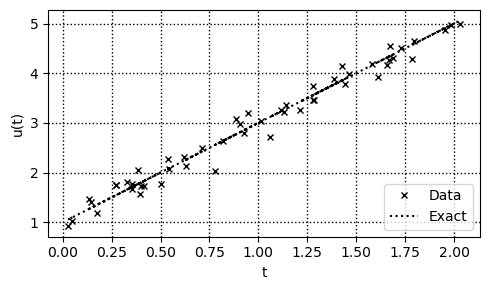

In [2]:
def y_exact(x):
    return 2 * x + 1

## Data
n_data, seed = 51, 42

np.random.seed(seed)
x_data = np.linspace(0, 2, n_data) + np.random.randn(n_data)*0.1
y_data = y_exact(x_data) + np.random.randn(n_data) * 0.2

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x_data, y_data, 'kx', ms=5, label="Data")
ax.plot(x_data, y_exact(x_data), 'k:', label="Exact")
ax.legend(loc="lower right")
ax.grid(color='k', ls=':', lw=1)
ax.set_xlabel("t")
ax.set_ylabel("u(t)")
fig.tight_layout()
plt.show()

### [numpy] Modeling and Training

- Manual backward propagation
- Manual update of weight and bias

In [3]:
# Modeling
a = 0.01    # weight
b = 0.01    # bias

learning_rate = 1e-3
n_epochs = 10000

x, y = x_data, y_data

for epoch in range(1, n_epochs + 1):
    # forward
    out = a * x + b
    loss = np.mean((out - y)**2)
    
    # backward
    grad_out = 2 * (out - y) / len(y)
    grad_a = np.sum(grad_out * x)
    grad_b = np.sum(grad_out)
    
    # update
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    
    if epoch % (n_epochs // 10) == 0:
        print(f"Epoch[{epoch}/{n_epochs}] loss: {loss:.2e} a: {a:.2e} b: {b:.2e}")

Epoch[1000/10000] loss: 5.37e-02 a: 1.70e+00 b: 1.29e+00
Epoch[2000/10000] loss: 4.19e-02 a: 1.79e+00 b: 1.23e+00
Epoch[3000/10000] loss: 3.66e-02 a: 1.84e+00 b: 1.18e+00
Epoch[4000/10000] loss: 3.38e-02 a: 1.87e+00 b: 1.14e+00
Epoch[5000/10000] loss: 3.23e-02 a: 1.90e+00 b: 1.11e+00
Epoch[6000/10000] loss: 3.15e-02 a: 1.92e+00 b: 1.09e+00
Epoch[7000/10000] loss: 3.11e-02 a: 1.93e+00 b: 1.07e+00
Epoch[8000/10000] loss: 3.08e-02 a: 1.94e+00 b: 1.06e+00
Epoch[9000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00
Epoch[10000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00


### [pytorch-1] Modeling and Training

- Manual backward propagation
- Manual update of weight and bias

In [4]:
# Modeling
a = torch.tensor(0.01).float()  # weight
b = torch.tensor(0.01).float()  # bias

learning_rate = 1e-3
n_epochs = 10000

learning_rate = 1e-3
n_epochs = 10000

x = torch.tensor(x_data).float()
y = torch.tensor(y_data).float()

for epoch in range(1, n_epochs + 1):
    # forward
    out = a * x + b
    loss = torch.mean((out - y)**2)
    
    # backward
    grad_out = 2 * (out - y) / len(y)
    grad_a = torch.sum(grad_out * x, axis=0)
    grad_b = torch.sum(grad_out, axis=0)
    
    # update
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    
    if epoch % (n_epochs // 10) == 0:
        print(f"Epoch[{epoch}/{n_epochs}] "
              f"loss: {loss.item():.2e} a: {a.item():.2e} b: {b.item():.2e}")

Epoch[1000/10000] loss: 5.37e-02 a: 1.70e+00 b: 1.29e+00
Epoch[2000/10000] loss: 4.19e-02 a: 1.79e+00 b: 1.23e+00
Epoch[3000/10000] loss: 3.66e-02 a: 1.84e+00 b: 1.18e+00
Epoch[4000/10000] loss: 3.38e-02 a: 1.87e+00 b: 1.14e+00
Epoch[5000/10000] loss: 3.23e-02 a: 1.90e+00 b: 1.11e+00
Epoch[6000/10000] loss: 3.15e-02 a: 1.92e+00 b: 1.09e+00
Epoch[7000/10000] loss: 3.11e-02 a: 1.93e+00 b: 1.07e+00
Epoch[8000/10000] loss: 3.08e-02 a: 1.94e+00 b: 1.06e+00
Epoch[9000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00
Epoch[10000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00


### [pytorch-2] Modeling and Training

- Automatic backward propagation
- Automacic update of weight and bias

In [5]:
# Modeling
a = torch.tensor(0.01, requires_grad=True).float()  # weight
b = torch.tensor(0.01, requires_grad=True).float()  # bias

learning_rate = 1e-3
n_epochs = 10000

x = torch.tensor(x_data).float()
y = torch.tensor(y_data).float()

optimizer = optim.SGD([a, b], lr=learning_rate)

for epoch in range(1, n_epochs + 1):
    # forward
    out = a * x + b
    loss = torch.mean((out - y)**2)
    
    # backward
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % (n_epochs // 10) == 0:
        print(f"Epoch[{epoch}/{n_epochs}] "
              f"loss: {loss.item():.2e} a: {a.item():.2e} b: {b.item():.2e}")

Epoch[1000/10000] loss: 5.37e-02 a: 1.70e+00 b: 1.29e+00
Epoch[2000/10000] loss: 4.19e-02 a: 1.79e+00 b: 1.23e+00
Epoch[3000/10000] loss: 3.66e-02 a: 1.84e+00 b: 1.18e+00
Epoch[4000/10000] loss: 3.38e-02 a: 1.87e+00 b: 1.14e+00
Epoch[5000/10000] loss: 3.23e-02 a: 1.90e+00 b: 1.11e+00
Epoch[6000/10000] loss: 3.15e-02 a: 1.92e+00 b: 1.09e+00
Epoch[7000/10000] loss: 3.11e-02 a: 1.93e+00 b: 1.07e+00
Epoch[8000/10000] loss: 3.08e-02 a: 1.94e+00 b: 1.06e+00
Epoch[9000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00
Epoch[10000/10000] loss: 3.07e-02 a: 1.95e+00 b: 1.05e+00
